In [12]:
import pandas as pd

# Load the dataset
file_path = r"C:\\Users\\Vedha Pranava\\Desktop\\Breast-Cancer-Detection-master\\data.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

## A1_a)

In [13]:
def summation(inputs, weights, bias):
    return sum(i * w for i, w in zip(inputs, weights)) + bias

# Example: Using first row of dataset for inputs
weights = [0.2, -0.5, 0.3]  # Example weights
bias = 1.0  # Example bias
inputs = data[['radius_mean', 'texture_mean', 'perimeter_mean']].iloc[0].values
output = summation(inputs, weights, bias)
print(f"Summation Output: {output}")


Summation Output: 36.248


## A1_b)

In [14]:
import math

# Step Function
def step_function(x):
    return 1 if x >= 0 else 0

# Bipolar Step Function
def bipolar_step_function(x):
    return 1 if x >= 0 else -1

# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# TanH Function
def tanh(x):
    return math.tanh(x)

# ReLU Function
def relu(x):
    return max(0, x)

# Leaky ReLU Function
def leaky_relu(x, alpha=0.01):
    return x if x >= 0 else alpha * x

# Test activation functions using the summation result
activation_step_function = step_function(output)
print(f"Step Activation Output: {activation_step_function}")

activation_bipolar_step_function = bipolar_step_function(output)
print(f"Bipolar step Activation Output: {activation_bipolar_step_function}")

activation_sigmoid = sigmoid(output)
print(f"Sigmoid Activation Output: {activation_sigmoid}")

activation_tanh = tanh(output)
print(f"Tanh Activation Output: {activation_tanh}")

activation_relu = relu(output)
print(f"Relu Activation Output: {activation_relu}")

activation_leaky_relu = leaky_relu(output)
print(f"Leaky Relu Activation Output: {activation_leaky_relu}")



Step Activation Output: 1
Bipolar step Activation Output: 1
Sigmoid Activation Output: 0.9999999999999998
Tanh Activation Output: 1.0
Relu Activation Output: 36.248
Leaky Relu Activation Output: 36.248


## A1_c)

In [15]:
# Comparator for Error Calculation
def comparator(predicted, actual):
    return actual - predicted

# Example: Target = 1 (for Malignant)
actual = 1  # Example target for Malignant
predicted = step_function(output)
error = comparator(predicted, actual)
print(f"Error: {error}")


Error: 0


## A2

In [16]:
# AND Gate Logic Example
def perceptron_and(inputs, weights, bias, learning_rate=0.05, epochs=1000):
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            summation_output = summation(inputs[i], weights, bias)
            predicted = step_function(summation_output)
            error = comparator(predicted, inputs[i][-1])
            total_error += error**2
            # Update weights and bias
            for j in range(len(weights)):
                weights[j] += learning_rate * error * inputs[i][j]
            bias += learning_rate * error
        if total_error <= 0.002:  # Convergence criteria
            break
    return weights, bias, epoch

# AND gate inputs
and_gate_inputs = [[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 1]]
weights = [0.2, -0.75]  # Initial weights
bias = 10  # Initial bias

weights, bias, epochs_to_converge = perceptron_and(and_gate_inputs, weights, bias)
print(f"Weights: {weights}, Bias: {bias}, Epochs to Converge: {epochs_to_converge}")


Weights: [0.1000000000000001, 0.05000000000000032], Bias: -0.10000000000000765, Epochs to Converge: 129


## A3


In [17]:
# Repeat A1 with different activation functions and compare convergence times

def perceptron_with_activation(inputs, weights, bias, activation_func, learning_rate=0.05, epochs=1000):
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            summation_output = summation(inputs[i], weights, bias)
            predicted = activation_func(summation_output)
            error = comparator(predicted, inputs[i][-1])
            total_error += error**2
            # Update weights and bias
            for j in range(len(weights)):
                weights[j] += learning_rate * error * inputs[i][j]
            bias += learning_rate * error
        if total_error <= 0.002:  # Convergence criteria
            break
    return weights, bias, epoch

# Activation Functions for AND gate
weights = [0.2, -0.75]
bias = 10
learning_rate = 0.05

for activation in [step_function, bipolar_step_function, sigmoid, relu]:
    weights, bias, epochs = perceptron_with_activation(and_gate_inputs, weights, bias, activation, learning_rate)
    print(f"Activation: {activation.__name__}, Weights: {weights}, Bias: {bias}, Epochs: {epochs}")


Activation: step_function, Weights: [0.1000000000000001, 0.05000000000000032], Bias: -0.10000000000000765, Epochs: 129
Activation: bipolar_step_function, Weights: [0.1000000000000001, 0.05000000000000032], Bias: -0.10000000000000765, Epochs: 999
Activation: sigmoid, Weights: [4.269513023364578, 4.263876593860676], Bias: -6.58132321326526, Epochs: 999
Activation: relu, Weights: [3.964458104504183, 3.9588216750002814], Bias: -6.886378132125656, Epochs: 19


## A4

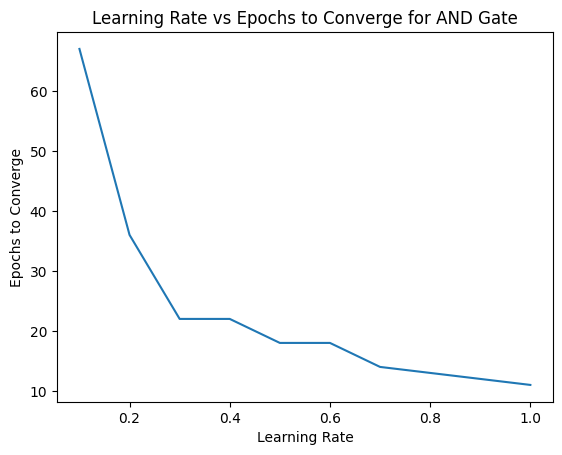

In [18]:
# Varying Learning Rate
learning_rates = [0.1 * i for i in range(1, 11)]
epochs_required = []

for lr in learning_rates:
    weights = [0.2, -0.75]
    bias = 10
    _, _, epochs = perceptron_and(and_gate_inputs, weights, bias, learning_rate=lr)
    epochs_required.append(epochs)

# Plot the learning rate vs epochs to converge
import matplotlib.pyplot as plt

plt.plot(learning_rates, epochs_required)
plt.xlabel('Learning Rate')
plt.ylabel('Epochs to Converge')
plt.title('Learning Rate vs Epochs to Converge for AND Gate')
plt.show()


## A5

In [68]:
# XOR Gate Inputs
xor_gate_inputs = [[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]]

# Repeat A1 for XOR gate
weights, bias, epochs_to_converge = perceptron_and(xor_gate_inputs, weights, bias)
print(f"Weights: {weights}, Bias: {bias}, Epochs to Converge for XOR: {epochs_to_converge}")


Weights: [-0.1000000000000003, -0.10000000000000052], Bias: 0.09999999999999236, Epochs to Converge for XOR: 999


## A6

In [19]:
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Perceptron training with sigmoid activation
def perceptron_with_activation(data, weights, bias, activation_func, learning_rate=0.05, epochs=1000):
    for epoch in range(epochs):
        total_error = 0
        for record in data:
            # Inputs are the first 3 values, output is the last value in the customer data
            inputs = np.array(record[:-1])  # Select first 3 columns (input features)
            actual_output = record[-1]      # Last column (target output)
            
            # Calculate weighted sum
            weighted_sum = np.dot(inputs, weights) + bias
            predicted_output = activation_func(weighted_sum)
            
            # Calculate error
            error = actual_output - predicted_output
            total_error += error**2
            
            # Update weights and bias using the error
            weights += learning_rate * error * inputs
            bias += learning_rate * error
        
        # Stop early if error is below a threshold
        if total_error <= 0.002:
            break

    return weights, bias, epoch + 1

# Customer transaction data with input features and target output
customer_data = [
    [20, 6, 2, 1], [16, 3, 6, 1], [27, 6, 2, 1], [19, 1, 2, 0], [24, 4, 2, 1],
    [22, 1, 5, 0], [15, 4, 2, 1], [18, 4, 2, 1], [21, 1, 4, 0], [16, 2, 4, 0]
]

# Initialize weights and bias
weights = np.array([0.1, 0.2, -0.3])  # Example initial weights
bias = 1.0  # Example initial bias

# Train the perceptron using sigmoid activation
final_weights, final_bias, epochs = perceptron_with_activation(customer_data, weights, bias, sigmoid, learning_rate=0.05)

print(f"Final Weights: {final_weights}, Final Bias: {final_bias}, Epochs to Converge: {epochs}")


Final Weights: [-1.33365352  8.84340193 -0.22341645], Final Bias: 0.7969978472159969, Epochs to Converge: 128


## A7

In [10]:
inputs = np.array([[20, 6, 2], [16, 3, 6], [27, 6, 2], [19, 1, 2], [24, 4, 2], [22, 1, 5], [15, 4, 2], [18, 4, 2], [21, 1, 4], [16, 2, 4]])
outputs = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])  # Converted to 0/1 from Yes/No

pseudo_inverse = np.linalg.pinv(inputs)
weights_pseudo = np.dot(pseudo_inverse, outputs)

print("Weights using pseudo-inverse:", weights_pseudo)


Weights using pseudo-inverse: [-0.0196597   0.26431172  0.04554979]


## A8

In [8]:
import numpy as np

# Sigmoid activation and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# AND gate inputs and outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([[0], [0], [0], [1]])  # AND gate outputs

# Initialize weights and bias for 2-layer neural network
input_layer_neurons = X.shape[1]  # 2 inputs
hidden_layer_neurons = 2  # 2 neurons in hidden layer
output_neurons = 1  # 1 output (AND gate result)

# Weights initialization
np.random.seed(42)
weights_input_hidden = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
weights_hidden_output = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
bias_hidden = np.random.uniform(size=(1, hidden_layer_neurons))
bias_output = np.random.uniform(size=(1, output_neurons))

# Set learning rate and epochs
learning_rate = 0.05
epochs = 1000

# Training the neural network
for epoch in range(epochs):
    # Forward propagation
    hidden_layer_activation = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_activation)
    
    output_layer_activation = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_activation)
    
    # Calculate error (mean squared error)
    error = y - predicted_output
    
    # Backpropagation
    # Output layer
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    
    # Hidden layer
    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
    
    # Updating weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    # Stop if error is less than 0.002
    if np.mean(np.square(error)) < 0.002:
        break

print(f"Weights (input to hidden): {weights_input_hidden}")
print(f"Weights (hidden to output): {weights_hidden_output}")
print(f"Bias (hidden): {bias_hidden}")
print(f"Bias (output): {bias_output}")
print(f"Epochs to converge: {epoch}")
print(f"Final Output: {predicted_output}")


Weights (input to hidden): [[0.35426245 0.8739027 ]
 [0.70801885 0.5542541 ]]
Weights (hidden to output): [[ 0.27351534]
 [-0.2888641 ]]
Bias (hidden): [[0.09929775 1.15169996]]
Bias (output): [[-0.94380849]]
Epochs to converge: 999
Final Output: [[0.26508702]
 [0.26909255]
 [0.26273347]
 [0.26811816]]


## A9

In [7]:
import numpy as np

# Sigmoid Activation and Derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Perceptron with Two Output Nodes for Logic Gates
def perceptron_two_outputs(inputs, outputs, learning_rate, epochs=1000):
    np.random.seed(1)
    weights = np.random.rand(2, 2)  # Two output nodes, so weight matrix is 2x2
    bias = np.random.rand(2)
    
    for epoch in range(epochs):
        z = np.dot(inputs, weights) + bias
        predictions = sigmoid(z)
        
        # Calculate error
        error = outputs - predictions
        
        # Backpropagation
        d_predicted = error * sigmoid_derivative(predictions)
        weights += np.dot(inputs.T, d_predicted) * learning_rate
        bias += np.sum(d_predicted, axis=0) * learning_rate
        
        if np.mean(np.abs(error)) <= 0.002:
            break
    
    return weights, bias, epoch

# Inputs and Outputs for AND Gate with Two Output Nodes
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([[1, 0], [1, 0], [1, 0], [0, 1]])  # [1, 0] for 0 output, [0, 1] for 1 output
learning_rate = 0.05

weights, bias, final_epoch = perceptron_two_outputs(inputs, outputs, learning_rate)
print("Weights:", weights)
print("Bias:", bias)
print("Converged in epoch:", final_epoch)


Weights: [[-1.78388314  1.89268966]
 [-1.79631178  1.87846402]]
Bias: [ 2.84487762 -2.98237526]
Converged in epoch: 999


## A10

In [4]:
import numpy as np

# Sigmoid Activation and Derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XOR Gate Neural Network with One Hidden Layer
def neural_network_xor_gate(inputs, outputs, learning_rate, epochs=10000):
    np.random.seed(1)
    
    # Initialize weights for input to hidden and hidden to output
    input_weights = np.random.rand(2, 2)
    hidden_weights = np.random.rand(2, 1)
    
    bias_hidden = np.random.rand(2)
    bias_output = np.random.rand(1)
    
    for epoch in range(epochs):
        # Forward pass
        hidden_layer_input = np.dot(inputs, input_weights) + bias_hidden
        hidden_layer_output = sigmoid(hidden_layer_input)
        
        output_layer_input = np.dot(hidden_layer_output, hidden_weights) + bias_output
        predictions = sigmoid(output_layer_input)
        
        # Calculate error
        error = outputs - predictions
        
        # Backpropagation
        d_output = error * sigmoid_derivative(predictions)
        error_hidden = d_output.dot(hidden_weights.T)
        d_hidden = error_hidden * sigmoid_derivative(hidden_layer_output)
        
        # Update weights and biases
        hidden_weights += hidden_layer_output.T.dot(d_output) * learning_rate
        input_weights += inputs.T.dot(d_hidden) * learning_rate
        bias_output += np.sum(d_output) * learning_rate
        bias_hidden += np.sum(d_hidden, axis=0) * learning_rate
        
        if np.mean(np.abs(error)) <= 0.002:
            break
    
    return input_weights, hidden_weights, bias_hidden, bias_output, epoch

# Inputs and Outputs for XOR Gate
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([[0], [1], [1], [0]])  # XOR Gate Output
learning_rate = 0.1

input_weights, hidden_weights, bias_hidden, bias_output, final_epoch = neural_network_xor_gate(inputs, outputs, learning_rate)
print("Input Weights:", input_weights)
print("Hidden Weights:", hidden_weights)
print("Bias Hidden:", bias_hidden)
print("Bias Output:", bias_output)
print("Converged in epoch:", final_epoch)


Input Weights: [[3.46802747 5.71076458]
 [3.44935246 5.61023422]]
Hidden Weights: [[-7.65614125]
 [ 7.04468282]]
Bias Hidden: [-5.2847457  -2.30318682]
Bias Output: [-3.14245311]
Converged in epoch: 9999


## A11

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# AND gate inputs and outputs
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])  # AND gate outputs

# XOR gate inputs and outputs
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])  # XOR gate outputs

# MLPClassifier for AND gate
mlp_and = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000)
mlp_and.fit(X_and, y_and)
y_and_pred = mlp_and.predict(X_and)
print(f"AND Gate Predictions: {y_and_pred}")
print(f"Accuracy for AND Gate: {accuracy_score(y_and, y_and_pred)}")

# MLPClassifier for XOR gate
mlp_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000)
mlp_xor.fit(X_xor, y_xor)
y_xor_pred = mlp_xor.predict(X_xor)
print(f"XOR Gate Predictions: {y_xor_pred}")
print(f"Accuracy for XOR Gate: {accuracy_score(y_xor, y_xor_pred)}")


AND Gate Predictions: [0 0 0 0]
Accuracy for AND Gate: 0.75
XOR Gate Predictions: [0 0 0 0]
Accuracy for XOR Gate: 0.5


C:\Users\Vedha Pranava\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## A12

In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset (replace the file path with your actual dataset path)
file_path = "C:\\Users\\Vedha Pranava\\Desktop\\Breast-Cancer-Detection-master\\data.csv"
data = pd.read_csv(file_path)

# Display the columns to help you identify the feature columns and the target column
print("Dataset Columns:", data.columns)

# Let's assume these columns as features (replace them with actual column names from your dataset)
# Select the features (input columns)
features = ['radius_se', 'concavity_se', 'concavity_worst']  # Adjust these column names based on your dataset

# Select the target column (the output you want to predict)
# For example, let's assume 'diagnosis' is the target column (change this if needed)
target = 'diagnosis'  # Adjust this column name based on your dataset

# Convert the target column into binary values if necessary (e.g., 'M' = 1, 'B' = 0)
data[target] = np.where(data[target] == 'M', 1, 0)

# Features (X) and Labels (y)
X = data[features]  # Input features
y = data[target]    # Target output (1 for Malignant, 0 for Benign, or adjust as per your data)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(5,), activation='relu', max_iter=1000, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Display the results
print(f"Test Predictions: {y_pred}")
print(f"True Labels: {y_test.values}")
print(f"Model Accuracy: {accuracy * 100:.2f}%")



Dataset Columns: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
Test Predictions: [0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1
 0 0 1]
True Labels: [0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0

C:\Users\Vedha Pranava\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
